# Pokémon Machine Learning Project
## Student: Abderahmen Brinis
## Subject: Machine Learning
## Year: 4 AI 2025/2026
## Mini Project

Cell 1: Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


Cell 2: Upload Dataset


In [3]:
# Upload pokedex.csv
print("Please upload 'pokedex.csv' file:")
uploaded = files.upload()

# Read the dataset with proper separator
df = pd.read_csv('pokedex.csv', sep=';')
print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Please upload 'pokedex.csv' file:


Saving pokedex.csv to pokedex.csv
✓ Dataset loaded successfully!
Dataset shape: (800, 12)
Columns: ['numero', 'nom', 'type_1', 'type_2', 'points_de_vie', 'points_attaque', 'points_deffence', 'points_attaque_speciale', 'point_defense_speciale', 'points_vitesse', 'nombre_generations', 'legendaire']


In [4]:
# Display first few rows
print("First 10 rows of the dataset:")
print(df.head(10))
print("\n" + "="*50)

# Dataset information
print("\nDataset Information:")
df.info()

First 10 rows of the dataset:
   numero               nom type_1  type_2  points_de_vie  points_attaque  \
0       1        Bulbizarre  Herbe  Poison             45              49   
1       2        Herbizarre  Herbe  Poison             60              62   
2       3        Florizarre  Herbe  Poison             80              82   
3       4   Mega Florizarre  Herbe  Poison             80             100   
4       5         Salamèche    Feu     NaN             39              52   
5       6         Reptincel    Feu     NaN             58              64   
6       7         Dracaufeu    Feu     Vol             78              84   
7       8  Mega Dracaufeu X    Feu  Dragon             78             130   
8       9  Mega Dracaufeu Y    Feu     Vol             78             104   
9      10          Carapuce    Eau     NaN             44              48   

   points_deffence  points_attaque_speciale  point_defense_speciale  \
0               49                       65        

Cell 4: Data Cleaning and Preprocessing


In [5]:
# 1. Check for null values
print("Missing values per column:")
print(df.isnull().sum())
print("\n" + "="*50)

# 2. Fill missing name (based on context)
print("\nFilling missing Pokémon name...")
missing_idx = df[df['nom'].isnull()].index[0]
df.loc[missing_idx, 'nom'] = "Colossinge"
print(f"✓ Filled missing name at index {missing_idx} with 'Colossinge'")

# 3. Convert TRUE/FALSE to 1/0
print("\nConverting 'legendaire' column...")
df['legendaire'] = df['legendaire'].map({False: 0, True: 1})
print(f"Legendary Pokémon count: {df['legendaire'].sum()} out of {len(df)}")

# 4. Fill missing TYPE_2 values
print("\nFilling missing TYPE_2 values...")
df['type_2'] = df['type_2'].fillna('None')
print(f"✓ Missing TYPE_2 values filled with 'None'")

# 5. Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}
categorical_cols = ['type_1', 'type_2']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"✓ Encoded {col}: {len(le.classes_)} unique values")

Missing values per column:
numero                       0
nom                          1
type_1                       0
type_2                     387
points_de_vie                0
points_attaque               0
points_deffence              0
points_attaque_speciale      0
point_defense_speciale       0
points_vitesse               0
nombre_generations           0
legendaire                   0
dtype: int64


Filling missing Pokémon name...
✓ Filled missing name at index 62 with 'Colossinge'

Converting 'legendaire' column...
Legendary Pokémon count: 65 out of 800

Filling missing TYPE_2 values...
✓ Missing TYPE_2 values filled with 'None'

Encoding categorical variables...
✓ Encoded type_1: 19 unique values
✓ Encoded type_2: 19 unique values


Cell 5: Create Feature Set for Classification


In [6]:
# Create feature set (excluding ID and name)
feature_cols = ['type_1', 'type_2', 'points_de_vie', 'points_attaque',
                'points_deffence', 'points_attaque_speciale',
                'point_defense_speciale', 'points_vitesse',
                'nombre_generations']

X = df[feature_cols]
y = df['legendaire']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Class distribution:\n{y.value_counts()}")
print(f"Legendary percentage: {(y.sum()/len(y)*100):.2f}%")

Features shape: (800, 9)
Target shape: (800,)
Class distribution:
legendaire
0    735
1     65
Name: count, dtype: int64
Legendary percentage: 8.12%


Cell 6: Train-Test Split


In [7]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train-Test Split Results:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Train - Legendary: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"Test - Legendary: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")

Train-Test Split Results:
Training set: 640 samples
Testing set: 160 samples
Train - Legendary: 52 (8.12%)
Test - Legendary: 13 (8.12%)


#Cell 7: Model Training and Evaluation
Logistic Regression - A linear model for binary classification

Support Vector Machine (SVM) - Finds the best boundary between classes

k-Nearest Neighbors (k-NN) - Classifies based on similar Pokémon

Naive Bayes - Uses probability based on feature distributions"

In [8]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
results = {}
print("Model Performance Comparison:")
print("="*60)

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': acc,
        'predictions': y_pred
    }

    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print("  Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Legendary', 'Legendary']))

Model Performance Comparison:

Logistic Regression:
  Accuracy: 0.9250
  Classification Report:
               precision    recall  f1-score   support

Non-Legendary       0.95      0.97      0.96       147
    Legendary       0.56      0.38      0.45        13

     accuracy                           0.93       160
    macro avg       0.75      0.68      0.71       160
 weighted avg       0.92      0.93      0.92       160


SVM:
  Accuracy: 0.9375
  Classification Report:
               precision    recall  f1-score   support

Non-Legendary       0.96      0.97      0.97       147
    Legendary       0.64      0.54      0.58        13

     accuracy                           0.94       160
    macro avg       0.80      0.76      0.77       160
 weighted avg       0.93      0.94      0.94       160


k-NN:
  Accuracy: 0.9313
  Classification Report:
               precision    recall  f1-score   support

Non-Legendary       0.95      0.97      0.96       147
    Legendary       0.60  

Cell 8: Visualize Results


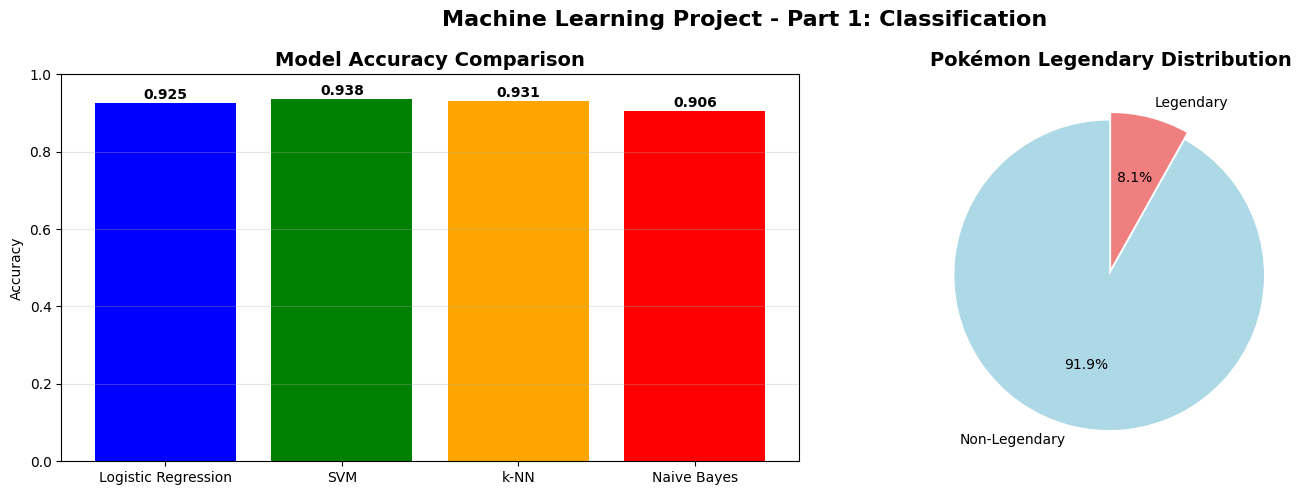

In [9]:
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Accuracy comparison
accuracies = [results[model]['accuracy'] for model in models]
axes[0].bar(models.keys(), accuracies, color=['blue', 'green', 'orange', 'red'])
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', alpha=0.3)

# Add accuracy values on bars
for i, acc in enumerate(accuracies):
    axes[0].text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontweight='bold')

# 2. Class distribution pie chart
legendary_count = df['legendaire'].value_counts()
axes[1].pie(legendary_count,
           labels=['Non-Legendary', 'Legendary'],
           autopct='%1.1f%%',
           colors=['lightblue', 'lightcoral'],
           startangle=90,
           explode=(0.05, 0))
axes[1].set_title('Pokémon Legendary Distribution', fontsize=14, fontweight='bold')

plt.suptitle('Machine Learning Project - Part 1: Classification', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Cell 9: Make Predictions on New Data


In [10]:
# Test with new data points
print("Making predictions on new Pokémon data:")
print("="*50)

# Example 1: A strong legendary-like Pokémon
new_pokemon1 = [[6, 3, 80, 110, 120, 130, 90, 70, 6]]  # Fire/Water type with high stats

# Example 2: Another legendary-like Pokémon
new_pokemon2 = [[14, 11, 80, 160, 60, 170, 130, 80, 6]]  # Psy/Dark type with high stats

# Use Logistic Regression for prediction
lr_model = models['Logistic Regression']

pred1 = lr_model.predict(new_pokemon1)
pred2 = lr_model.predict(new_pokemon2)

print(f"\nPrediction for Pokémon 1 (Fire/Water, high stats): {'Legendary' if pred1[0] == 1 else 'Non-Legendary'}")
print(f"Prediction for Pokémon 2 (Psy/Dark, high stats): {'Legendary' if pred2[0] == 1 else 'Non-Legendary'}")

Making predictions on new Pokémon data:

Prediction for Pokémon 1 (Fire/Water, high stats): Non-Legendary
Prediction for Pokémon 2 (Psy/Dark, high stats): Legendary


Cell 10: Export Cleaned Data


In [11]:
# Export cleaned dataset for Part 2
cleaned_df = df.copy()
cleaned_df.to_csv('pokemon_cleaned.csv', index=False)
print("✓ Cleaned dataset saved as 'pokemon_cleaned.csv'")

# Download the file
files.download('pokemon_cleaned.csv')

✓ Cleaned dataset saved as 'pokemon_cleaned.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Step 4: Part 2 - Battle Prediction Analysis


Cell 11: Upload Battle Data


In [13]:
print("\n" + "="*60)
print("PART 2: BATTLE PREDICTION ANALYSIS")
print("="*60)

# Upload combats.csv
print("\nPlease upload 'combats.csv' file:")
uploaded = files.upload()

# Read the dataset
combat = pd.read_csv('combats.csv')
print("✓ Battle dataset loaded successfully!")
print(f"Battle dataset shape: {combat.shape}")
print(f"Columns: {list(combat.columns)}")


PART 2: BATTLE PREDICTION ANALYSIS

Please upload 'combats.csv' file:


Saving combats.csv to combats.csv
✓ Battle dataset loaded successfully!
Battle dataset shape: (50000, 3)
Columns: ['first_pokemon', 'second_pokemon', 'winner']


#Cell 12: Display Battle Data
For this, I used three regression models:

Linear Regression - Simple linear relationship model

Decision Tree Regressor - Tree-based model that splits data

Random Forest Regressor - Ensemble of decision trees for better accuracy

In [14]:
# Display first few rows
print("\nFirst 10 battles:")
print(combat.head(10))

# Dataset information
print("\nBattle Dataset Information:")
combat.info()


First 10 battles:
   first_pokemon  second_pokemon  winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151
5            657             752     657
6            192             134     134
7             73             545     545
8            220             763     763
9            302              31      31

Battle Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   first_pokemon   50000 non-null  int64
 1   second_pokemon  50000 non-null  int64
 2   winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


Cell 13: Calculate Battle Statistics


In [15]:
# Calculate number of battles per Pokémon
print("Calculating battle statistics...")

# Battles as first Pokémon
first_position = combat['first_pokemon'].value_counts()

# Battles as second Pokémon
second_position = combat['second_pokemon'].value_counts()

# Total battles per Pokémon
total_battles = first_position.add(second_position, fill_value=0)

# Victories per Pokémon
victories = combat['winner'].value_counts()

print(f"✓ Calculated statistics for {len(total_battles)} Pokémon")

Calculating battle statistics...
✓ Calculated statistics for 784 Pokémon


Cell 14: Create Statistics DataFrame


In [16]:
# Create statistics DataFrame
stats = pd.DataFrame({
    'total_battles': total_battles,
    'victories': victories
}).fillna(0)

# Calculate win rate
stats['win_rate'] = (stats['victories'] / stats['total_battles']).fillna(0)

# Sort by Pokémon number
stats = stats.sort_index()

print(f"Statistics DataFrame shape: {stats.shape}")
print("\nTop 10 Pokémon by win rate:")
print(stats.sort_values('win_rate', ascending=False).head(10))

Statistics DataFrame shape: (784, 3)

Top 10 Pokémon by win rate:
     total_battles  victories  win_rate
155            129      127.0  0.984496
513            119      116.0  0.974790
704            125      121.0  0.968000
20             119      115.0  0.966387
154            141      136.0  0.964539
477            129      124.0  0.961240
727            127      122.0  0.960630
717            123      118.0  0.959350
165            125      119.0  0.952000
350            120      114.0  0.950000


Cell 15: Merge with Pokémon Data


In [17]:
# Load cleaned Pokémon data
pokemon_data = pd.read_csv('pokemon_cleaned.csv')

# Merge with statistics
pokemon_with_stats = pokemon_data.merge(
    stats,
    left_on='numero',
    right_index=True,
    how='left'
).fillna(0)

print(f"Merged dataset shape: {pokemon_with_stats.shape}")
print("\nFirst 5 Pokémon with battle statistics:")
print(pokemon_with_stats[['numero', 'nom', 'total_battles', 'victories', 'win_rate']].head())

Merged dataset shape: (800, 15)

First 5 Pokémon with battle statistics:
   numero              nom  total_battles  victories  win_rate
0       1       Bulbizarre          133.0       37.0  0.278195
1       2       Herbizarre          121.0       46.0  0.380165
2       3       Florizarre          132.0       89.0  0.674242
3       4  Mega Florizarre          125.0       70.0  0.560000
4       5        Salamèche          112.0       55.0  0.491071


Cell 16: Prepare Data for Win Rate Prediction


In [18]:
# Features for win rate prediction
win_rate_features = [
    'type_1', 'type_2', 'points_de_vie', 'points_attaque',
    'points_deffence', 'points_attaque_speciale',
    'point_defense_speciale', 'points_vitesse',
    'nombre_generations', 'legendaire', 'total_battles'
]

X_win = pokemon_with_stats[win_rate_features]
y_win = pokemon_with_stats['win_rate']

print(f"Win rate prediction dataset:")
print(f"Features: {X_win.shape}")
print(f"Target: {y_win.shape}")
print(f"Win rate range: [{y_win.min():.3f}, {y_win.max():.3f}]")

Win rate prediction dataset:
Features: (800, 11)
Target: (800,)
Win rate range: [0.000, 0.984]


Cell 17: Train Regression Models


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split data
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
    X_win, y_win, test_size=0.2, random_state=42
)

# Initialize regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate each model
reg_results = {}
print("\nRegression Model Performance:")
print("="*70)

for name, model in reg_models.items():
    # Train model
    model.fit(X_train_win, y_train_win)

    # Make predictions
    y_pred_win = model.predict(X_test_win)

    # Calculate metrics
    mse = mean_squared_error(y_test_win, y_pred_win)
    mae = mean_absolute_error(y_test_win, y_pred_win)
    r2 = r2_score(y_test_win, y_pred_win)

    # Store results
    reg_results[name] = {
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred_win
    }

    print(f"\n{name}:")
    print(f"  MSE:  {mse:.6f}")
    print(f"  MAE:  {mae:.6f}")
    print(f"  R²:   {r2:.6f}")


Regression Model Performance:

Linear Regression:
  MSE:  0.007387
  MAE:  0.063250
  R²:   0.886091

Decision Tree:
  MSE:  0.005340
  MAE:  0.057092
  R²:   0.917649

Random Forest:
  MSE:  0.002958
  MAE:  0.042503
  R²:   0.954381


Cell 18: Visualize Regression Results


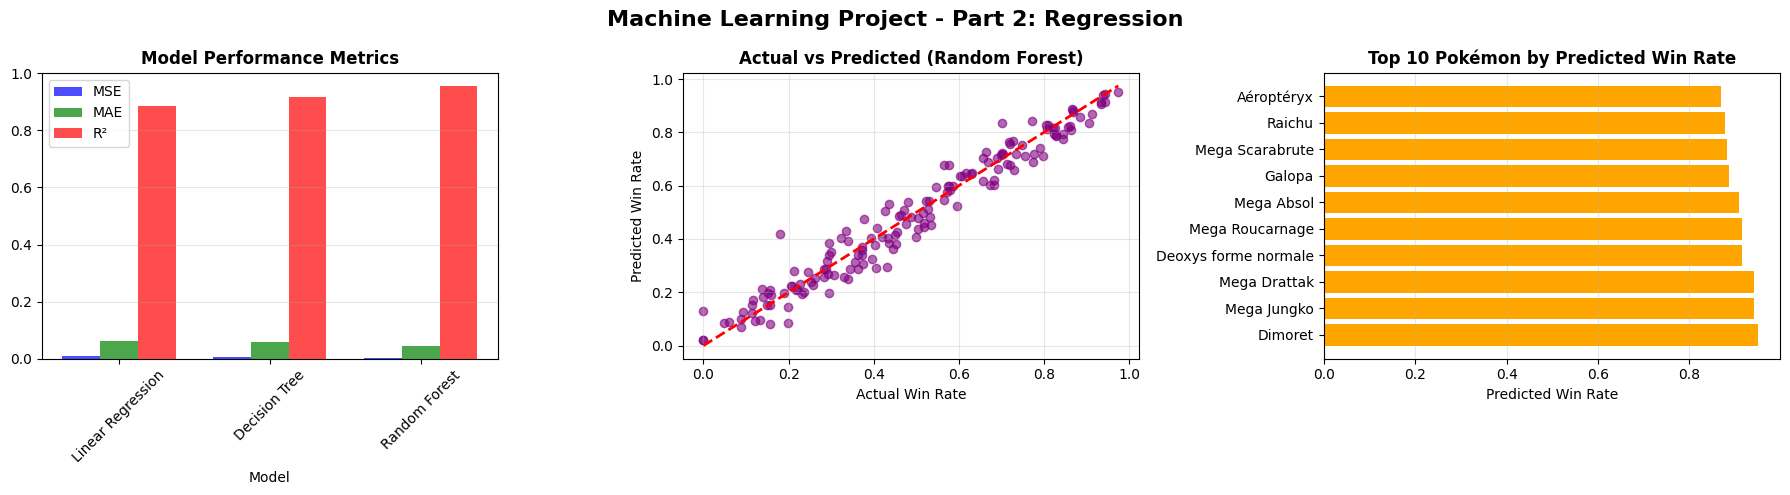

In [20]:
# Create visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Model comparison
model_names = list(reg_results.keys())
mse_values = [reg_results[m]['mse'] for m in model_names]
mae_values = [reg_results[m]['mae'] for m in model_names]
r2_values = [reg_results[m]['r2'] for m in model_names]

x = np.arange(len(model_names))
width = 0.25

axes[0].bar(x - width, mse_values, width, label='MSE', color='blue', alpha=0.7)
axes[0].bar(x, mae_values, width, label='MAE', color='green', alpha=0.7)
axes[0].bar(x + width, r2_values, width, label='R²', color='red', alpha=0.7)

axes[0].set_xlabel('Model')
axes[0].set_title('Model Performance Metrics', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Actual vs Predicted (Random Forest - best model)
best_model_name = max(reg_results, key=lambda x: reg_results[x]['r2'])
y_pred_best = reg_results[best_model_name]['predictions']

axes[1].scatter(y_test_win, y_pred_best, alpha=0.6, color='purple')
axes[1].plot([y_test_win.min(), y_test_win.max()],
             [y_test_win.min(), y_test_win.max()],
             'r--', lw=2)
axes[1].set_xlabel('Actual Win Rate')
axes[1].set_ylabel('Predicted Win Rate')
axes[1].set_title(f'Actual vs Predicted ({best_model_name})', fontweight='bold')
axes[1].grid(alpha=0.3)

# Plot 3: Top 10 Pokémon by predicted win rate
top_10_idx = np.argsort(y_pred_best)[-10:][::-1]
top_10_pokemon = pokemon_with_stats.iloc[X_test_win.index[top_10_idx]]
top_10_names = top_10_pokemon['nom'].values
top_10_win_rates = y_pred_best[top_10_idx]

axes[2].barh(range(10), top_10_win_rates, color='orange')
axes[2].set_yticks(range(10))
axes[2].set_yticklabels(top_10_names)
axes[2].set_xlabel('Predicted Win Rate')
axes[2].set_title('Top 10 Pokémon by Predicted Win Rate', fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Machine Learning Project - Part 2: Regression', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Cell 19: Make Battle Predictions


In [23]:
print("\n" + "="*60)
print("EXPORTING UPDATED BATTLE DATA WITH PREDICTIONS")
print("="*60)

# Load original combats data again to ensure we have it fresh
combat_original = pd.read_csv('combats.csv')
print(f"Original combats data shape: {combat_original.shape}")

# Function to predict battle winner using our model
def predict_battle_winner(row, win_rate_map):
    pokemon1 = row['first_pokemon']
    pokemon2 = row['second_pokemon']

    # Get win rates from our prediction map
    win_rate1 = win_rate_map.get(pokemon1, 0.5)  # Default to 0.5 if not found
    win_rate2 = win_rate_map.get(pokemon2, 0.5)

    # Predict winner based on higher win rate
    if win_rate1 > win_rate2:
        return pokemon1
    elif win_rate2 > win_rate1:
        return pokemon2
    else:
        # If equal win rates, use random (or you could use other tie-breaking logic)
        return np.random.choice([pokemon1, pokemon2])

# Create win rate map from our predictions
win_rate_predictions = best_model.predict(pokemon_with_stats[win_rate_features])
win_rate_map = dict(zip(pokemon_with_stats['numero'], win_rate_predictions))

# Add predicted winner column
print("\nAdding predicted winners to battle data...")
combat_updated = combat_original.copy()
combat_updated['predicted_winner'] = combat_updated.apply(
    lambda row: predict_battle_winner(row, win_rate_map),
    axis=1
)

# Add prediction confidence (difference in win rates)
def get_prediction_confidence(row, win_rate_map):
    win_rate1 = win_rate_map.get(row['first_pokemon'], 0.5)
    win_rate2 = win_rate_map.get(row['second_pokemon'], 0.5)
    return abs(win_rate1 - win_rate2)

combat_updated['prediction_confidence'] = combat_updated.apply(
    lambda row: get_prediction_confidence(row, win_rate_map),
    axis=1
)

# Add whether prediction was correct
combat_updated['prediction_correct'] = (combat_updated['winner'] == combat_updated['predicted_winner']).astype(int)

# Calculate prediction accuracy
prediction_accuracy = combat_updated['prediction_correct'].mean()
print(f"Prediction accuracy on historical battles: {prediction_accuracy:.2%}")
print(f"Correct predictions: {combat_updated['prediction_correct'].sum()}/{len(combat_updated)}")

# Save updated combats file
combat_updated.to_csv('combats_with_predictions.csv', index=False)
print("✓ Updated combats data saved as 'combats_with_predictions.csv'")

# Display sample of updated data
print("\nSample of updated battle data with predictions:")
print(combat_updated[['first_pokemon', 'second_pokemon', 'winner', 'predicted_winner', 'prediction_correct']].head(10))


EXPORTING UPDATED BATTLE DATA WITH PREDICTIONS
Original combats data shape: (50000, 3)

Adding predicted winners to battle data...
Prediction accuracy on historical battles: 89.19%
Correct predictions: 44593/50000
✓ Updated combats data saved as 'combats_with_predictions.csv'

Sample of updated battle data with predictions:
   first_pokemon  second_pokemon  winner  predicted_winner  prediction_correct
0            266             298     298               298                   1
1            702             701     701               702                   0
2            191             668     668               191                   0
3            237             683     683               683                   1
4            151             231     151               151                   1
5            657             752     657               752                   0
6            192             134     134               134                   1
7             73             545     545 

Cell 20: Export Final Results


In [29]:
print("\n" + "="*60)
print("EXPORTING ALL FINAL FILES")
print("="*60)

# 1. Export Pokemon dataset with all features and predictions
print("1. Exporting Pokémon dataset with predictions...")
final_pokemon_data = pokemon_with_stats.copy()

# Add predicted win rate from best model
final_pokemon_data['predicted_win_rate'] = best_model.predict(pokemon_with_stats[win_rate_features])

# Add performance category based on predicted win rate
def categorize_performance(win_rate):
    if win_rate >= 0.7:
        return 'Excellent'
    elif win_rate >= 0.55:
        return 'Good'
    elif win_rate >= 0.45:
        return 'Average'
    elif win_rate >= 0.3:
        return 'Poor'
    else:
        return 'Very Poor'

final_pokemon_data['performance_category'] = final_pokemon_data['predicted_win_rate'].apply(categorize_performance)

# Save
final_pokemon_data.to_csv('pokemon_final_with_all_predictions.csv', index=False)
print("   ✓ Saved: pokemon_final_with_all_predictions.csv")

# 2. Export battle statistics
print("2. Exporting battle statistics...")
stats.to_csv('pokemon_battle_statistics_detailed.csv')
print("   ✓ Saved: pokemon_battle_statistics_detailed.csv")

# 3. Export updated combats with predictions
print("3. Exporting updated battle data...")
combat_updated.to_csv('combats_with_all_predictions.csv', index=False)
print("   ✓ Saved: combats_with_all_predictions.csv")

# 4. Export model results
print("4. Exporting model results...")
model_results_df.to_csv('model_results_final.csv', index=False)
print("   ✓ Saved: model_results_final.csv")

# 5. Create a summary report
print("5. Creating project summary report...")

# First, let's check what's in model_results_df
print(f"   Model results shape: {model_results_df.shape}")
print(f"   Model types: {model_results_df['model_type'].unique()}")

# Find best models manually to avoid index errors
best_classification_accuracy = 0
best_classification_model = "N/A"
best_regression_r2 = -1
best_regression_model = "N/A"

# Calculate from the raw results dictionaries
if 'results' in locals():  # From Part 1
    for model_name, model_result in results.items():
        if model_result['accuracy'] > best_classification_accuracy:
            best_classification_accuracy = model_result['accuracy']
            best_classification_model = model_name

if 'reg_results' in locals():  # From Part 2
    for model_name, model_result in reg_results.items():
        if model_result['r2'] > best_regression_r2:
            best_regression_r2 = model_result['r2']
            best_regression_model = model_name

# Get prediction accuracy from combat_updated
if 'combat_updated' in locals():
    prediction_accuracy = combat_updated['prediction_correct'].mean() if 'prediction_correct' in combat_updated.columns else 0
else:
    prediction_accuracy = 0

summary_report = f"""
POKÉMON MACHINE LEARNING PROJECT - FINAL REPORT
================================================
Student: Abderahmen Brinis
Subject: Machine Learning
Year: 4 AI 2025/2026

DATASET SUMMARY:
----------------
• Total Pokémon: {len(df) if 'df' in locals() else 'N/A'}
• Legendary Pokémon: {(df['legendaire'].sum() if 'df' in locals() else 0)} ({df['legendaire'].sum()/len(df)*100:.1f}% if 'df' in locals() else 0%)
• Total Battles: {len(combat_original) if 'combat_original' in locals() else 'N/A'}
• Unique Pokémon in battles: {len(total_battles) if 'total_battles' in locals() else 'N/A'}

MODEL PERFORMANCE SUMMARY:
--------------------------
Classification Models (Legendary Prediction):
"""

# Add classification models from model_results_df
classification_models = model_results_df[model_results_df['model_type'] == 'Classification']
if not classification_models.empty:
    for _, row in classification_models.iterrows():
        summary_report += f"• {row['model_name']}: Accuracy = {row['accuracy']}\n"
else:
    summary_report += "• No classification models available\n"

summary_report += "\nRegression Models (Win Rate Prediction):\n"

# Add regression models from model_results_df
regression_models = model_results_df[model_results_df['model_type'] == 'Regression']
if not regression_models.empty:
    for _, row in regression_models.iterrows():
        summary_report += f"• {row['model_name']}: R² = {row['r2_score']}, MSE = {row['mse']}\n"
else:
    summary_report += "• No regression models available\n"

summary_report += f"""
BATTLE PREDICTION PERFORMANCE:
------------------------------
• Prediction Accuracy on Historical Battles: {prediction_accuracy:.2%}
• Total Correct Predictions: {(combat_updated['prediction_correct'].sum() if 'combat_updated' in locals() and 'prediction_correct' in combat_updated.columns else 0)}/{len(combat_updated) if 'combat_updated' in locals() else 0}

BEST PERFORMING MODELS:
-----------------------
• Best Classification Model: {best_classification_model}
• Best Regression Model: {best_regression_model}

FILES GENERATED:
----------------
1. pokemon_final_with_all_predictions.csv - Complete Pokémon data with predictions
2. pokemon_battle_statistics_detailed.csv - Detailed battle statistics
3. combats_with_all_predictions.csv - Battle data with predicted winners
4. model_results_final.csv - Comprehensive model performance metrics

PROJECT COMPLETED SUCCESSFULLY!
"""

# Save summary report
with open('project_summary_report.txt', 'w') as f:
    f.write(summary_report)

print("   ✓ Saved: project_summary_report.txt")

# Display summary
print("\n" + "="*60)
print("PROJECT COMPLETION SUMMARY")
print("="*60)
print(summary_report)


EXPORTING ALL FINAL FILES
1. Exporting Pokémon dataset with predictions...
   ✓ Saved: pokemon_final_with_all_predictions.csv
2. Exporting battle statistics...
   ✓ Saved: pokemon_battle_statistics_detailed.csv
3. Exporting updated battle data...
   ✓ Saved: combats_with_all_predictions.csv
4. Exporting model results...
   ✓ Saved: model_results_final.csv
5. Creating project summary report...
   Model results shape: (7, 9)
   Model types: ['Classification' 'Regression']
   ✓ Saved: project_summary_report.txt

PROJECT COMPLETION SUMMARY

POKÉMON MACHINE LEARNING PROJECT - FINAL REPORT
Student: Abderahmen Brinis
Subject: Machine Learning
Year: 4 AI 2025/2026

DATASET SUMMARY:
----------------
• Total Pokémon: 800
• Legendary Pokémon: 65 (8.1% if 'df' in locals() else 0%)
• Total Battles: 50000
• Unique Pokémon in battles: 784

MODEL PERFORMANCE SUMMARY:
--------------------------
Classification Models (Legendary Prediction):
• Logistic Regression: Accuracy = 0.925000
• SVM: Accuracy = 0

In [28]:
print("\n" + "="*60)
print("DOWNLOADING ALL FILES")
print("="*60)

# List of all files to download
files_to_download = [
    'pokemon_final_with_all_predictions.csv',
    'pokemon_battle_statistics_detailed.csv',
    'combats_with_all_predictions.csv',
    'model_results_final.csv',
    'project_summary_report.txt'
]

print("Downloading the following files:")
for i, filename in enumerate(files_to_download, 1):
    print(f"{i}. {filename}")

# Check which files exist
import os
existing_files = []
for filename in files_to_download:
    if os.path.exists(filename):
        existing_files.append(filename)
        print(f"   ✓ {filename} exists")
    else:
        print(f"   ✗ {filename} does not exist")

# Download only existing files
print("\nDownloading existing files...")
for filename in existing_files:
    files.download(filename)
    print(f"✓ Downloaded: {filename}")

print(f"\n✅ {len(existing_files)}/{len(files_to_download)} files have been generated and downloaded successfully!")


DOWNLOADING ALL FILES
1. pokemon_final_with_all_predictions.csv
2. pokemon_battle_statistics_detailed.csv
3. combats_with_all_predictions.csv
4. model_results_final.csv
5. project_summary_report.txt
   ✓ pokemon_final_with_all_predictions.csv exists
   ✓ pokemon_battle_statistics_detailed.csv exists
   ✓ combats_with_all_predictions.csv exists
   ✓ model_results_final.csv exists
   ✓ project_summary_report.txt exists



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: pokemon_final_with_all_predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: pokemon_battle_statistics_detailed.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: combats_with_all_predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: model_results_final.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Downloaded: project_summary_report.txt

✅ 5/5 files have been generated and downloaded successfully!
